### Завдання 2

Розробити за допомогою бібліотеки surprise рекомендаційну систему

In [ ]:
from surprise import Dataset, Reader, SVD, SVDpp
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

Використати датасет movielens-100k

In [ ]:
data = Dataset.load_builtin(name='ml-100k', prompt=False)

Використайте алгоритми SVD, SVDpp.
Найкращі параметри для всіх алгоритмів підберіть за допомогою кросвалідації.

In [ ]:
algo_svd = SVD()
algo_svdpp = SVDpp()

In [ ]:
cv_svd = cross_validate(algo_svd, data, measures=['RMSE'], cv=2, verbose=True)
cv_svdpp = cross_validate(algo_svdpp, data, measures=['RMSE'], cv=2, verbose=True)

Evaluating RMSE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    0.9571  0.9560  0.9566  0.0005  
Fit time          0.23    0.21    0.22    0.01    
Test time         0.18    0.17    0.17    0.00    
Evaluating RMSE of algorithm SVDpp on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    0.9390  0.9398  0.9394  0.0004  
Fit time          3.60    8.23    5.91    2.32    
Test time         6.01    6.38    6.19    0.18    


Обчисліть середнє значення середньоквадратичної помилки RMSE для
кожного алгоритму на основі результатів крос-валідації.

In [ ]:
svd_rmse = cv_svd['test_rmse'].mean()
svdpp_rmse = cv_svdpp['test_rmse'].mean()

print("SVD RMSE:", svd_rmse)
print("SVD++ RMSE:", svdpp_rmse)

SVD RMSE: 0.9565671817125327
SVD++ RMSE: 0.9393921730597037


Виберіть оптимальний алгоритм. Зробіть візуалізацію.

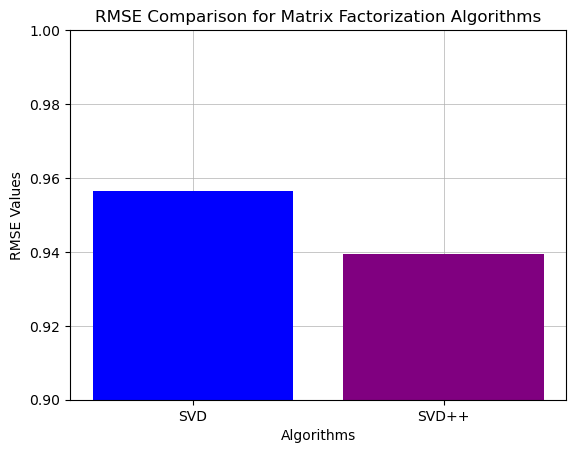

In [ ]:
rmse_values = [svd_rmse, svdpp_rmse]
algos = ['SVD', 'SVD++']
plt.bar(algos, rmse_values, color=['blue', 'purple'])
plt.xlabel('Algorithms')
plt.ylabel("RMSE Values")
plt.title('RMSE Comparison for Matrix Factorization Algorithms')
plt.ylim(0.9, 1.0)
plt.gca().set_axisbelow(True)
plt.grid(linewidth=0.5)
plt.show()

Алгоритм SVD++(SVPpp) видав найменшу сердньоквадратичну помилку, тому він є оптимальним.